In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns

# SENTINEL

Se realizara un análisis de los datos disponibles en las bandas 4 y 8, bandas necesarias para calcular el NDVI (NDVI (Sentinel 2) = (B8 – B4) / (B8 + B4))


## Banda 4 (Rojo)

In [2]:
# Cargar el archivo TIFF Sentinel 2
file_path = 'data/S2A_MSIL2A_20250424T152711_N0511_R025_T18PYU_20250425T012413.SAFE/GRANULE/L2A_T18PYU_A051388_20250424T152706/IMG_DATA/R10m/T18PYU_20250424T152711_B04_10m.jp2'
src_sentinel_B4 = rasterio.open(file_path)

### Información general del raster

In [3]:
# Abrir y leer los datos
with rasterio.open(file_path) as src_sentinel_B4:
    band4_sentinel = src_sentinel_B4.read(1)
    width = src_sentinel_B4.width
    height = src_sentinel_B4.height
    bands = src_sentinel_B4.count

# Imprimir dimensiones
print(f"Dimensiones datos (ancho x alto): {width} x {height}")
print(f"Número de bandas: {bands}")




Dimensiones datos (ancho x alto): 10980 x 10980
Número de bandas: 1


In [20]:
# Contar píxeles con valor 0
num_ceros = np.sum(band4_sentinel == 0)

print(f"Número de píxeles con valor 0: {num_ceros}")

Número de píxeles con valor 0: 0


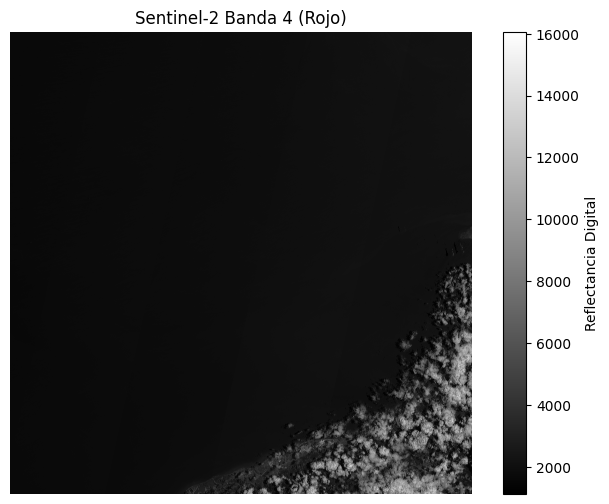

In [ ]:
# Mostrar imagen en escala de grises
plt.figure(figsize=(8, 6))
plt.imshow(band4_sentinel, cmap='gray')
plt.title('Sentinel-2 Banda 4 (Rojo)')
plt.axis('off')
plt.colorbar(label='DN')
plt.show()


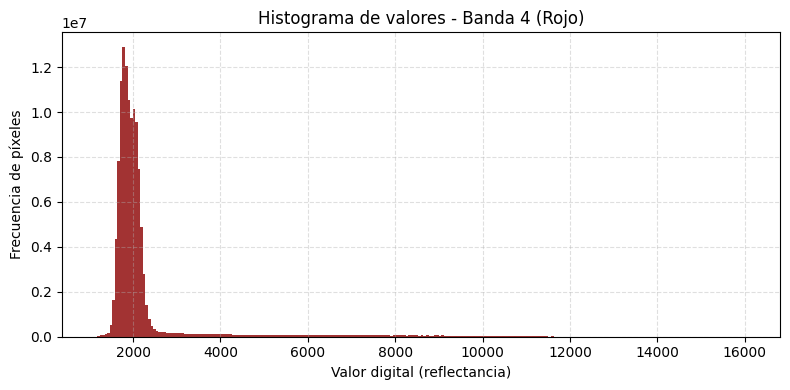

In [ ]:

# Crear histograma de los valores de píxeles
plt.figure(figsize=(8, 4))
plt.hist(band4_sentinel.flatten(), bins=256, color='darkred', alpha=0.8)
plt.title('Histograma de valores - Banda 4 (Rojo)')
plt.xlabel('DN')
plt.ylabel('Frecuencia de píxeles')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Reflectancia a nivel del suelo
L2A_SRi = (L2A_DNi + BOA_ADD_OFFSETi) / QUANTIFICATION_VALUE
donde
- BOA_ADD_OFFSETi = 10000
- QUANTIFICATION_VALUE = -1000
- Digital Number DN=0 remains the “NO_DATA” value

In [9]:
num_ceros = np.sum(band4_sentinel == 0)
print(f"Número de píxeles con valor 0: {num_ceros}")


Número de píxeles con valor 0: 0


In [16]:
BOA_ADD_OFFSET = -1000
QUANTIFICATION_VALUE = 10000

In [17]:
reflectancia_band4_sentinel = (band4_sentinel + BOA_ADD_OFFSET) / QUANTIFICATION_VALUE

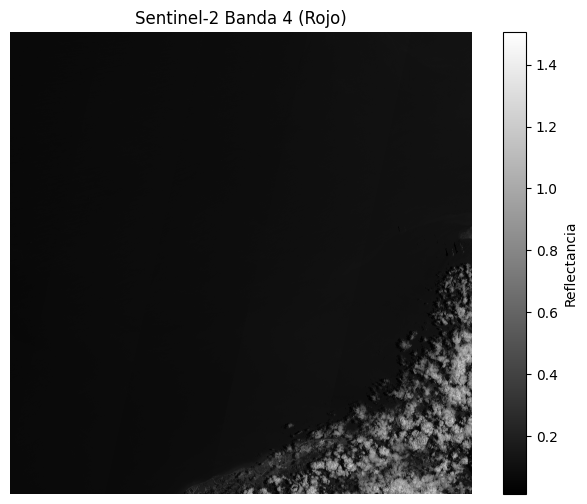

In [18]:
# Mostrar imagen en escala de grises
plt.figure(figsize=(8, 6))
plt.imshow(reflectancia_band4_sentinel, cmap='gray')
plt.title('Sentinel-2 Banda 4 (Rojo)')
plt.axis('off')
plt.colorbar(label='Reflectancia')
plt.show()

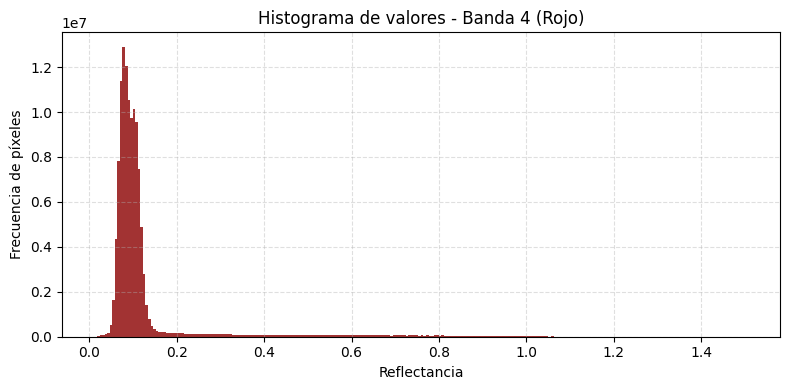

In [19]:

# Crear histograma de los valores de píxeles
plt.figure(figsize=(8, 4))
plt.hist(reflectancia_band4_sentinel.flatten(), bins=256, color='darkred', alpha=0.8)
plt.title('Histograma de valores - Banda 4 (Rojo)')
plt.xlabel('Reflectancia')
plt.ylabel('Frecuencia de píxeles')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular estadísticas básicas
print("Estadísticas descriptivas de reflectancia:")
print(f"Cantidad de píxeles: {reflectancia_band4_sentinel.size}")
print(f"Min: {np.min(reflectancia_band4_sentinel):.4f}")
print(f"Max: {np.max(reflectancia_band4_sentinel):.4f}")
print(f"Media (mean): {np.mean(reflectancia_band4_sentinel):.4f}")
print(f"Mediana: {np.median(reflectancia_band4_sentinel):.4f}")
print(f"Desviación estándar (std): {np.std(reflectancia_band4_sentinel):.4f}")
print(f"Percentil 25: {np.percentile(reflectancia_band4_sentinel, 25):.4f}")
print(f"Percentil 75: {np.percentile(reflectancia_band4_sentinel, 75):.4f}")
print(f"Percentil 90: {np.percentile(reflectancia_band4_sentinel, 90):.4f}")

Estadísticas descriptivas de reflectancia:
Cantidad de píxeles: 120560400
Min: 0.0117
Max: 1.5056
Media (mean): 0.1267
Mediana: 0.0926
Desviación estándar (std): 0.1364
Percentil 25: 0.0776
Percentil 75: 0.1104
Percentil 90: 0.1400
